<a href="https://colab.research.google.com/github/spikol/mmla/blob/main/svm_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Support Vector Machines with Scikit-learn
In this [tutorial](https://colab.research.google.com/github/akshayrb22/playing-with-data/blob/master/supervised_learning/support_vector_machine/svm.ipynb#scrollTo=XlOodOxqj7CQ), you'll learn about Support Vector Machines, one of the most popular and widely used supervised machine learning algorithms.

SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.

In another [tutorial](https://https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python), you will be using scikit-learn in Python. If you would like to learn more about this Python package, I recommend you take a look at our Supervised Learning with scikit-learn course.

SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.
####Support Vector Machines
Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.
#####Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

#####Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

#####Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.




###Loading Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline

### Loading in the PELARS data

In [2]:
col_names = ['session', 'time', 'distance', 'per', 'hand', 'num', 'audio', 'ide', 'label']
# load dataset
url='https://raw.githubusercontent.com/spikol/mmla/main/data_full_01.csv'
#skip first row in csv since column labels
pelars = pd.read_csv(url, header=0, names=col_names)
pelars = pelars.drop(['time'],axis=1)  #Dropping unncessary columns
pelars.head()  #Displaying first five rows of the dataset

,session,distance,per,hand,num,audio,ide,label
0,1552,0.856020,0.538462,0.510407,18.076923,0.548573,1,0
1,1553,1.294250,0.942308,0.945247,16.096154,1.404692,2,0
2,1554,1.266581,0.961538,0.672268,15.903846,1.023435,5,0
3,1555,1.238911,0.980769,0.399288,15.711538,0.642178,2,0
4,1556,1.211242,1.000000,0.126309,15.519231,0.260921,2,0


####Exploring Data
After you have loaded the dataset, you might want to know a little bit more about it. You can check feature and target names.

In [3]:
pelars1 = pelars[pelars.label == 1]
pelars2 = pelars[pelars.label == 0]

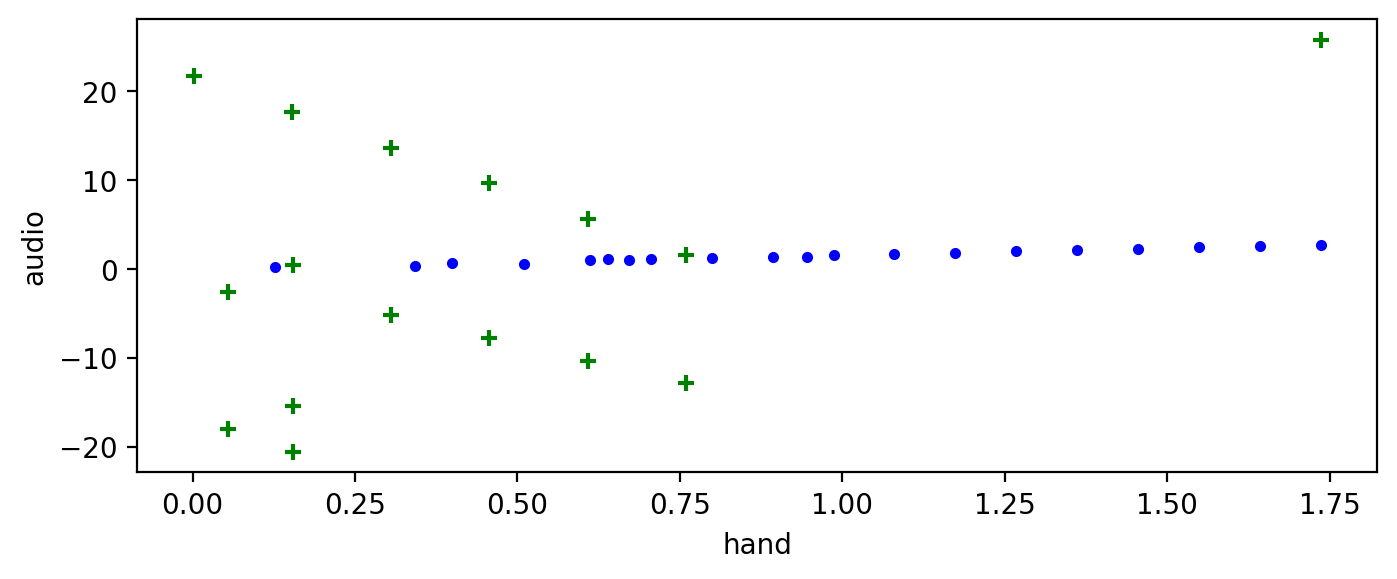

In [4]:
plt.figure(figsize=(8, 3), dpi=200)
plt.xlabel('hand')
plt.ylabel('audio')
plt.scatter(pelars1['hand'], pelars1['audio'], color='green', marker='+')
plt.scatter(pelars2['hand'], pelars2['audio'], color='blue', marker='.')
plt.savefig('sample_data/dtree.png')

####Remove the Label 

In [5]:
X = pelars.drop(['label'], axis='columns')
X.head()

,session,distance,per,hand,num,audio,ide
0,1552,0.856020,0.538462,0.510407,18.076923,0.548573,1
1,1553,1.294250,0.942308,0.945247,16.096154,1.404692,2
2,1554,1.266581,0.961538,0.672268,15.903846,1.023435,5
3,1555,1.238911,0.980769,0.399288,15.711538,0.642178,2
4,1556,1.211242,1.000000,0.126309,15.519231,0.260921,2


#### Training with the label and making predictions

In [6]:
y = pelars.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
#prediction
predictions = model.predict(X_test)
print(predictions)

[1 0 1 1 0 1 0 1 0 1 0]


#### Evaluating the Model

In [7]:
percentage = model.score(X_test, y_test)
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[5 0]
 [0 6]]
Test Set: 11
Accuracy = 100.0 %
